In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import glob
import zipfile
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

In [ ]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K  

In [ ]:
tf.__version__

'1.15.0'

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
ls

'My Drive'/


In [ ]:
cd My\ Drive

/content/drive/My Drive


In [ ]:
ls

 00168812_Nishan_Shrestha_CP.rar
 20170128_080350.mp4
 20170320_134147.mp4
'4th sem.rar'
'ASSESSMENT SOLUTIONS'/
'Assignment L4DC'/
'Book 12-20170731T045907Z-001.zip'
'Chapter I.docx'
'Colab Notebooks'/
'Copy of Cambridge IELTS 11.zip'
'Copy of medical_image_segmentation-master.zip'
 CPAssignment.rar
 FirebaseTesting.zip
'Getting started.pdf'
'Gilbert Strang - Introduction to Linear Algebra Fifth Edition-WELLESLEY -CAMBRIDGE PRESS (2016 ).pdf'
'Introductory Data Structures and Algorithm.rar'
'Level 6 Sem 2.pdf'
'Main (1).gdoc'
'Main (2).gdoc'
 Main.docx
 Main.gdoc
 medical_image_segmentation-master.rar
'Past Papers'/
'Resume (1).gdoc'
 Resume.gdoc
'Screenshot from 2019-05-02 12-43-32.png'
'Screenshot from 2019-05-02 12-43-50.png'
'Screenshot from 2019-05-02 12-45-44.png'
'Screenshot from 2019-05-02 12-45-55.png'
'Screenshot from 2019-05-02 12-51-21.png'
'Screenshot from 2019-05-02 12-52-31.png'
'Screenshot from 2019-05-02 12-56-12.png'
'Screenshot from 2019-05-02 12-57-30.png'
'Screens

In [ ]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
ls

 AI_ASSIGNMENTS/
'AUTOMATIC DR GRADING PREDICTION.ipynb'
 blood_vessel.ipynb
'BLOOD VESSELS SEGMENTATION.ipynb'
 CARS_PLANES_CLASSIFICATION
'DR - DME GRADING WEIGHTS'/
 DR_GRADE_TRANSFER_LEARN.ipynb
 DR_GRADE_VGG
 DR_GRADING_DATASET/
 DR_GRADING_TRY
 Grading_Diabetic_Retinopathy.ipynb
 HARD_EXUDATES_SEGMENTATION.ipynb
 HEMORRHAGES_SEGMENTATION.ipynb
 HE_PATCH_DATASET/
 HX_PATCH_DATASET/
 Kaggle_Dataset_Download_Try
 MA_IMAGE_SEGMENTATION_TRY.ipynb
 MA_PATCH_DATASET/
 ma_segmentation_master/
 ma_segment.ipynb
 medical_image_segmentation-master/
 medical_image_segmentation-master.zip
 MICROANEURYSMS_SEGMENTATION.ipynb
 MOBILENET_TRANSFER_LEARN.ipynb
 OD_PATCH_DATASET/
'Online training for image segmentation unet.ipynb'
 OPTIC_DISC_SEGMENTATION.ipynb
'Prajwal Pokhrel - Classification-Using-A-Decision-Tree.ipynb'
'SECOND TRY FOR IMAGE SEGMENTATION.ipynb'
 SE_PATCH_DATASET/
 SOFT_EXUDATES_SEGMENTATION.ipynb
'UNET MODEL TRY.ipynb'


In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content/drive/My Drive/Colab Notebooks


In [ ]:
competition_name = os.path.join(current_dir, 'SE_PATCH_DATASET')

In [ ]:
os.listdir(competition_name)

['Images', 'Labels']

In [ ]:
# If there are any duplicates, this code will delete that
duplicates = []
for filenames in os.listdir(label_dir):
  if filenames not in os.listdir(image_dir):
    duplicates.append(filenames)

In [ ]:
for dd in duplicates:
  print(dd)

IDRiD_51_p87 (1).jpg
IDRiD_52_p125 (1).jpg
IDRiD_52_p123 (1).jpg
IDRiD_52_p124 (1).jpg
IDRiD_52_p141 (1).jpg
IDRiD_52_p139 (1).jpg
IDRiD_51_p9 (1).jpg
IDRiD_52_p140 (1).jpg
IDRiD_52_p157 (1).jpg
IDRiD_52_p156 (1).jpg


In [ ]:
for fileName in duplicates:
  os.remove(os.path.join(label_dir, "{}".format(fileName)))

In [ ]:
image_dir = os.path.join(competition_name, "Images/Train_Images")
label_dir = os.path.join(competition_name, "Labels/Train_Labels")
print("Train Images: ", len(os.listdir(image_dir)))
print("Train Labels: ", len(os.listdir(label_dir)))

Train Images:  482
Train Labels:  482


In [ ]:
x_train_filenames  = []
y_train_filenames = []

for imgs_name in os.listdir(image_dir):
  x_train_filenames.append(os.path.join(image_dir, "{}".format(imgs_name)))
  y_train_filenames.append(os.path.join(label_dir, "{}".format(imgs_name)))

In [ ]:
validation_image_dir = os.path.join(competition_name, "Images/Test_Images")
validation_label_dir = os.path.join(competition_name, "Labels/Test_Labels")
print("Test Images: ", len(os.listdir(validation_image_dir)))
print("Test Labels: ", len(os.listdir(validation_label_dir)))

Test Images:  179
Test Labels:  179


In [ ]:
x_val_filenames = []
y_val_filenames = []

for val_imgs_name in os.listdir(validation_image_dir):
  x_val_filenames.append(os.path.join(validation_image_dir, "{}".format(val_imgs_name)))
  y_val_filenames.append(os.path.join(validation_label_dir, "{}".format(val_imgs_name)))

In [ ]:
num_train_examples = len(x_train_filenames)
num_train_label_examples = len(y_train_filenames)
num_val_examples = len(x_val_filenames)
num_val_label_examples = len(y_val_filenames)

print("Number of training Images examples: {}".format(num_train_examples))
print("Number of training Labels examples: {}".format(num_train_label_examples))
print("")
print("Number of validation Images examples: {}".format(num_val_examples))
print("Number of validation Labels examples: {}".format(num_val_label_examples))

Number of training Images examples: 482
Number of training Labels examples: 482

Number of validation Images examples: 179
Number of validation Labels examples: 179


In [ ]:
# Here's what the paths look like

x_train_filenames[:10]

['/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p41.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_03_p149.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p25.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p38.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_03_p148.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p24.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p37.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p40.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p39.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Train_Images/IDRiD_08_p23.jpg']

In [ ]:
y_train_filenames[:10]

['/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p41.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_03_p149.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p25.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p38.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_03_p148.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p24.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p37.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p40.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p39.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Train_Labels/IDRiD_08_p23.jpg']

In [ ]:
x_val_filenames[:10]

['/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_55_p104.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_55_p105.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_55_p106.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_55_p121.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_55_p89.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_56_p107.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_55_p90.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_55_p120.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_56_p106.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Images/Test_Images/IDRiD_56_p11.jpg']

In [ ]:
y_val_filenames[:10]

['/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_55_p104.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_55_p105.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_55_p106.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_55_p121.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_55_p89.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_56_p107.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_55_p90.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_55_p120.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_56_p106.jpg',
 '/content/drive/My Drive/Colab Notebooks/SE_PATCH_DATASET/Labels/Test_Labels/IDRiD_56_p11.jpg']

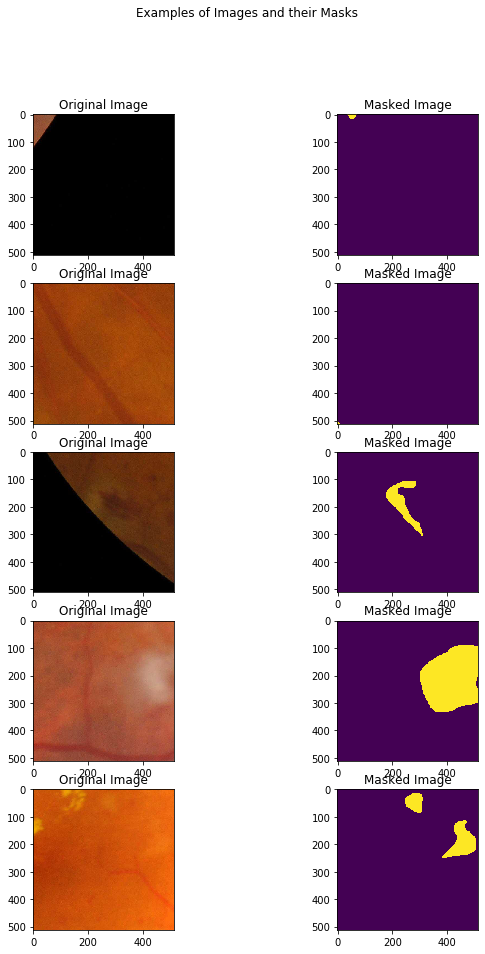

In [ ]:
# Visualize

display_num = 5
r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize = (10, 15))
for i in range(0, display_num * 2, 2):
  img_num = r_choices[i // 2]
  # print(img_num)
  x_pathname = x_train_filenames[img_num]
  y_pathname = y_train_filenames[img_num]

  plt.subplot(display_num, 2, i + 1)
  plt.imshow(mpimg.imread(x_pathname))
  plt.title("Original Image")

  example_labels = Image.open(y_pathname)
  label_vals = np.unique(example_labels)

  plt.subplot(display_num, 2, i + 2)
  plt.imshow(example_labels)
  plt.title("Masked Image")

plt.suptitle("Examples of Images and their Masks")
plt.show()

In [ ]:
img_shape = (256, 256, 3)
batch_size = 4
epochs = 10

In [ ]:
# Preprocessing each pathname

def _process_pathnames(fname, label_path):
  img_str = tf.read_file(fname)
  img = tf.image.decode_jpeg(img_str, channels = 3)

  label_img_str = tf.read_file(label_path)
  label_img = tf.image.decode_jpeg(label_img_str, channels = 1)
  label_img = label_img[:, :, 0]
  label_img = tf.expand_dims(label_img, axis = -1)
  return img, label_img

In [ ]:
def shift_img(output_img, label_img, width_shift_range, height_shift_range):
  """This fn will perform the horizontal or vertical shift"""
  if width_shift_range or height_shift_range:
    if width_shift_range:
      width_shift_range = tf.random_uniform([], 
                                              -width_shift_range * img_shape[1],
                                              width_shift_range * img_shape[1])
    if height_shift_range:
      height_shift_range = tf.random_uniform([],
                                               -height_shift_range * img_shape[0],
                                               height_shift_range * img_shape[0])
    # Translate both 
    output_img = tfcontrib.image.translate(output_img,
                                             [width_shift_range, height_shift_range])
    label_img = tfcontrib.image.translate(label_img,
                                             [width_shift_range, height_shift_range])
  return output_img, label_img

In [ ]:
def flip_img(horizontal_flip, tr_img, label_img):
  if horizontal_flip:
    flip_prob = tf.random_uniform([], 0.0, 1.0)
    tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                lambda: (tr_img, label_img))
  return tr_img, label_img

In [ ]:
def _augment(img,
             label_img,
             resize=None,  
             scale=1,  
             hue_delta=0,  
             horizontal_flip=False,  
             width_shift_range=0,  
             height_shift_range=0):
  if resize is not None:
    # Resize both images
    label_img = tf.image.resize_images(label_img, resize)
    img = tf.image.resize_images(img, resize)
  
  if hue_delta:
    img = tf.image.random_hue(img, hue_delta)
  
  img, label_img = flip_img(horizontal_flip, img, label_img)
  img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)
  label_img = tf.to_float(label_img) * scale
  img = tf.to_float(img) * scale 
  return img, label_img

In [ ]:
def get_baseline_dataset(filenames, 
                         labels,
                         preproc_fn=functools.partial(_augment),
                         threads=5, 
                         batch_size=batch_size,
                         shuffle=True):           
  num_x = len(filenames)
  
  dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

  dataset = dataset.map(_process_pathnames, num_parallel_calls=threads)
  if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
    assert batch_size == 1, "Batching images must be of the same size"

  dataset = dataset.map(preproc_fn, num_parallel_calls=threads)
  
  if shuffle:
    dataset = dataset.shuffle(num_x)
  
  dataset = dataset.repeat().batch(batch_size)
  return dataset

In [ ]:
tr_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
    'hue_delta': 0.1,
    'horizontal_flip': True,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1
}
tr_preprocessing_fn = functools.partial(_augment, **tr_cfg)

In [ ]:
val_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
}
val_preprocessing_fn = functools.partial(_augment, **val_cfg)

In [ ]:
train_ds = get_baseline_dataset(x_train_filenames,
                                y_train_filenames,
                                preproc_fn=tr_preprocessing_fn,
                                batch_size=batch_size)
val_ds = get_baseline_dataset(x_val_filenames,
                              y_val_filenames, 
                              preproc_fn=val_preprocessing_fn,
                              batch_size=batch_size)




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


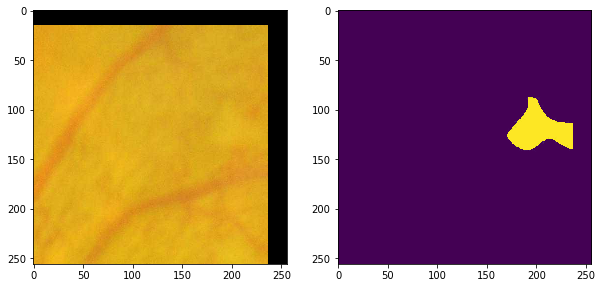

In [ ]:
temp_ds = get_baseline_dataset(x_train_filenames, 
                               y_train_filenames,
                               preproc_fn=tr_preprocessing_fn,
                               batch_size=1,
                               shuffle=False)

data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()
with tf.Session() as sess: 
  batch_of_imgs, label = sess.run(next_element)

  plt.figure(figsize=(10, 10))
  img = batch_of_imgs[0]

  plt.subplot(1, 2, 1)
  plt.imshow(img)

  plt.subplot(1, 2, 2)
  plt.imshow(label[0, :, :, 0])
  plt.show()

In [ ]:
# model

def conv_block(input_tensor, num_filters):
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
  encoder = layers.BatchNormalization()(encoder)
  encoder = layers.Activation('relu')(encoder)
  return encoder

def encoder_block(input_tensor, num_filters):
  encoder = conv_block(input_tensor, num_filters)
  encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
  
  return encoder_pool, encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
  decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
  decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
  decoder = layers.BatchNormalization()(decoder)
  decoder = layers.Activation('relu')(decoder)
  return decoder

In [ ]:
inputs = layers.Input(shape=img_shape)
# 256

encoder0_pool, encoder0 = encoder_block(inputs, 32)
# 128

encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
# 64

encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
# 32

encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
# 16

encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
# 8

center = conv_block(encoder4_pool, 1024)
# center

decoder4 = decoder_block(center, encoder4, 512)
# 16

decoder3 = decoder_block(decoder4, encoder3, 256)
# 32

decoder2 = decoder_block(decoder3, encoder2, 128)
# 64

decoder1 = decoder_block(decoder2, encoder1, 64)
# 128

decoder0 = decoder_block(decoder1, encoder0, 32)
# 256

outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model = models.Model(inputs=[inputs], outputs=[outputs])

In [ ]:
# custom metrices
def dice_coeff(y_true, y_pred):
  smooth = 1.
  # Flatten
  y_true_f = tf.reshape(y_true, [-1])
  y_pred_f = tf.reshape(y_pred, [-1])
  intersection = tf.reduce_sum(y_true_f * y_pred_f)
  score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
  return score

In [ ]:
def dice_loss(y_true, y_pred):
  loss = 1 - dice_coeff(y_true, y_pred)
  return loss

In [ ]:
def bce_dice_loss(y_true, y_pred):
  loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
  return loss

In [ ]:
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_loss])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        


In [ ]:
save_model_path = '/tmp/SE_weights.hdf5'
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_dice_loss', save_best_only=True, verbose=1)

In [ ]:
history = model.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=val_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp],verbose=1)

Train on 121 steps, validate on 45 steps
Epoch 1/10
120/121 [============================>.] - ETA: 1s - loss: 1.1337 - dice_loss: 0.8926
Epoch 00001: val_dice_loss improved from inf to 0.92221, saving model to /tmp/SE_weights.hdf5
121/121 [==============================] - 287s 2s/step - loss: 1.1323 - dice_loss: 0.8920 - val_loss: 7.9097 - val_dice_loss: 0.9222
Epoch 2/10
120/121 [============================>.] - ETA: 0s - loss: 0.9700 - dice_loss: 0.8231
Epoch 00002: val_dice_loss did not improve from 0.92221
121/121 [==============================] - 17s 138ms/step - loss: 0.9691 - dice_loss: 0.8224 - val_loss: 1.1522 - val_dice_loss: 0.9730
Epoch 3/10
120/121 [============================>.] - ETA: 0s - loss: 0.8963 - dice_loss: 0.7580
Epoch 00003: val_dice_loss did not improve from 0.92221
121/121 [==============================] - 17s 137ms/step - loss: 0.8952 - dice_loss: 0.7573 - val_loss: 1.5870 - val_dice_loss: 0.9303
Epoch 4/10
120/121 [============================>.] - ET

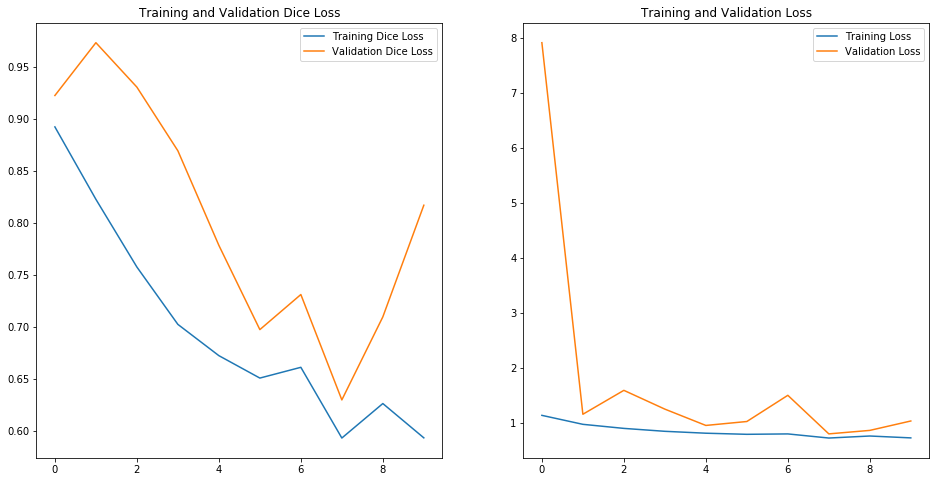

In [ ]:
# Visualize training process
dice = history.history['dice_loss']
val_dice = history.history['val_dice_loss']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, dice, label='Training Dice Loss')
plt.plot(epochs_range, val_dice, label='Validation Dice Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Dice Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:

model = models.load_model(save_model_path, custom_objects={'bce_dice_loss': bce_dice_loss,
                                                           'dice_loss': dice_loss})

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


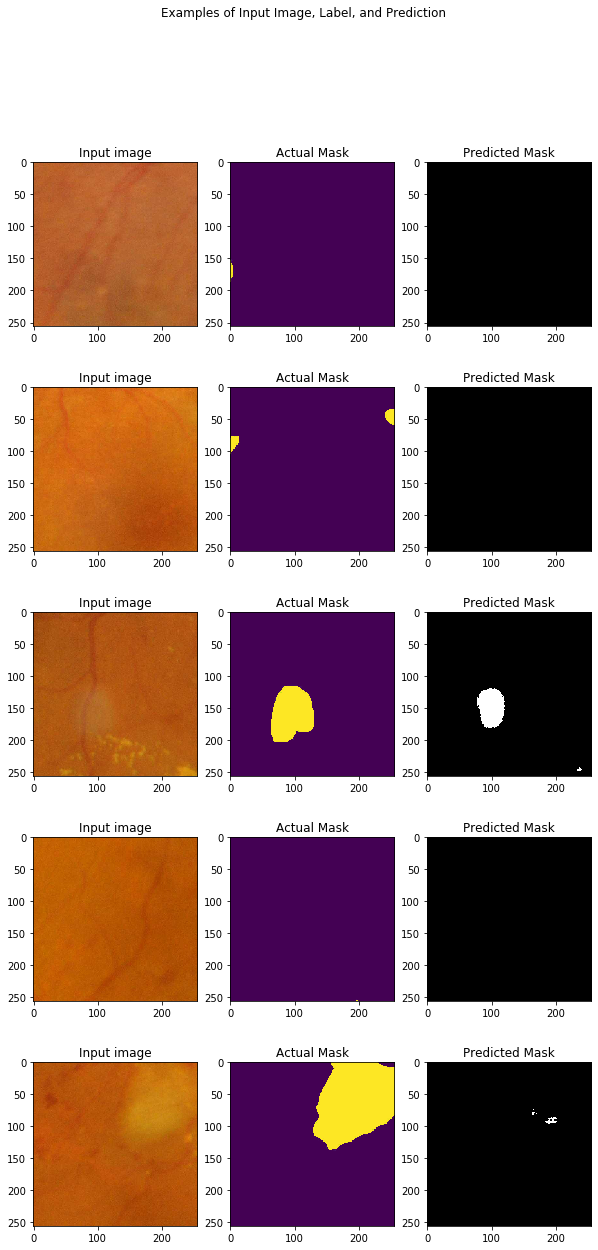

In [ ]:

data_aug_iter = val_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()


plt.figure(figsize=(10, 20))
for i in range(5):
  batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
  img = batch_of_imgs[0]
  predicted_label = model.predict(batch_of_imgs)[0]

  plt.subplot(5, 3, 3 * i + 1)
  plt.imshow(img)
  plt.title("Input image")
  
  plt.subplot(5, 3, 3 * i + 2)
  plt.imshow(label[0, :, :, 0])
  plt.title("Actual Mask")
  plt.subplot(5, 3, 3 * i + 3)
  plt.imshow(predicted_label[:, :, 0]>0.9, cmap='gray')
  plt.title("Predicted Mask")
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()

In [ ]:
# AND HERE WE GO!! 
# THANK YOU :)